# Programación lineal

# Datos Personales

    Carlos Riolo Sotelo, Exp. 735124
    16/02/2023

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf 

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="200px" height="125px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

 $$ y \geq 3x + 4 $$

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

### Análisis del problema:
¿Sobre que tengo control? Cantidades de Producto A y B
1. Minimizar Costo
2. $x_a$ es la cantidad en gramos de producto A
2. $x_b$ es la cantidad en gramos de producto B
3. Función a optmizar
    - $0.6 x_a + 0.2 x_b$
4. Info Adicional
    - Prod. Final como minimo (mayor o igual a): 25g Prote, 6g de Grasa, 30g de Azucar
    - $0.3 x_a + 0.05 x_b \geq 25$
    - $0.01 x_a + 0.07 x_b \geq 6$
    -$ 0.1 x_a + 0.1 x_b \geq 30$

min 

$x_a , x_b$

$0.6 x_a + 0.2 x_b$

   s.t. 
   
- $0.3 x_a + 0.05 x_b \geq 25$

- $0.01 x_a + 0.07 x_b \geq 6$

- $ 0.1 x_a + 0.1 x_b \geq 30$

Solución Gráfica
¿Qué queremos graficar?
- $0.3 x_a + 0.05 x_b \geq 25$
- $0.01 x_a + 0.07 x_b \geq 6$
- $ 0.1 x_a + 0.1 x_b \geq 30$

Despejamos para tener una variable dependiente e independiente, $x_b$ será dependiente de $x_a$

- $x_b \geq \frac{25-0.3 x_a}{0.05}$

- $x_b \geq \frac{6-0.01 x_a}{0.07}$

- $x_b \geq \frac{30-0.1 x_a}{0.1}$



(0.0, 500.0)

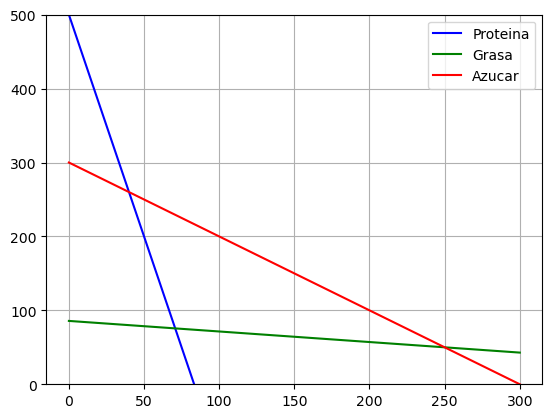

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

xA=np.linspace(0,300,100)
y_r1=(25-0.3*xA)/.05
y_r2=(6-0.01*xA)/.07
y_r3=(30-0.1*xA)/0.1

plt.figure()
plt.plot(xA,y_r1, "b", label="Proteina")
plt.plot(xA,y_r2, "g", label="Grasa")
plt.plot(xA,y_r3, "r", label="Azucar")
plt.grid()
plt.legend(loc="best")
plt.ylim(0,500)



Las intersecciones: 



In [30]:
r1=(25-0.3*x)/.05
r2=(6-0.01*x)/.07
r3=(30-0.1*x)/0.1
xa=sp.solve(r1-r3,x)
xb=r1.subs(x,xa[0])
(xa,xb)

([40.0000000000000], 260.000000000000)

In [28]:
def fun_costos(xa,xb):
    return 0.6*xa+0.2*xb
fun_costos(40,260)


76.0

In [31]:
xa=sp.solve(r2-r3,x)
xb=r2.subs(x,xa[0])
(xa,xb)

([250.000000000000], 50.0000000000000)

In [32]:
fun_costos(250,50)

160.0

La solución sera el vertice en el punto (40,260), donde el costo es de \$76

A comparación de \$160 que sería el otro vertice (250,50) que cumple con las condiciones

Los valores de Proteinas, Grasas y Azucares son los siguientes:
- Proteinas: 25g
- Grasas: 18.1g
- Azucares: 30g

## Con Algebra Lineal

** Cambiar los signos de la Matriz generadora de ecuaciones y la de las restricciones **
1. Vector de Variables $[x]$
2. Vector de Coeficientes $C$ para $[x]$
3. Matriz de Coeficientes de desigualdades $[A]$
4. Vector de Limites y restricciones $[b]$


### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves. 

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche. 

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias? 

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.



Resolviendo el problema 2 (Maximización de utilidad en carros y camiones), con la función `linprog`

In [1]:
import numpy as np
import sympy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline



## Planteamiento del Problema

Variables de las que tengo control
- $x_t$ son los numeros de camiones
- $x_c$ son los numeros de coche

Función a Maximizar
- $600 x_t + 200 x_c$

Info. Adicional y Restricciones
- $7 x_t + 2 x_c \leq 300$
- $3 x_t + 3 x_c \leq 270$

In [3]:
c= np.array([-600, -200]) #Se pone signo negativo porque estamos maximizando en una herramienta de minimización

Aub=np.array([ [7.0, 2.0],
               [3.0, 3.0]
             ])

bub=np.array([300, 270])

fin=opt.linprog(c,Aub,bub)
fin

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -27600.0
       ineqlin:  marginals: array([-80.        , -13.33333333])
  residual: array([0., 0.])
         lower:  marginals: array([0., 0.])
  residual: array([24., 66.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([24., 66.])

## Interpretación de Resultados

Para que las ganancias sean máximas, se tienen que producir 24 carrocerias de camiones y 66 carrocerias de coche. Las utilidades son de \$27,600

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/_static/images/scipy_med.png" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería. 

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [2]:
import scipy.optimize as opt

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [14]:
opt.linprog?

# Problema 2.1 con opt.linprog

In [4]:
import numpy as np

#Maximizar es lo mismo que minimizar con signo contrario por lo que se multiplica por -1#

c=np.array([0.6, 0.2])
Aub=np.array([ [-0.30, -0.05],
               [-0.01, -0.07], 
               [-0.10, -0.10]
             ])
bub=np.array([-25, -6, -30])

resp=opt.linprog(c,Aub,bub)
resp

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 76.0
       ineqlin:  marginals: array([-1.6, -0. , -1.2])
  residual: array([ 0. , 12.6,  0. ])
         lower:  marginals: array([0., 0.])
  residual: array([ 40., 260.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([ 0. , 12.6,  0. ])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([ 40., 260.])

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, comparte pantalla para explicarlo y le subiré la nota de alguna tarea a 100.**

Variables de las cuales tengo control
- $a , c$

Función a Optimizar
- Maximizar $15a+20c$

Info Adicional
- $0.5a+1c \leq 10$ Restricción de Horas
- $ a+c \leq 15$ Restricción de Unidades 
- opt.linprog solo minimiza, entonces hay que cambiar el signo del vector C
- Como las restricciones ya estan en "Menor o Igual", no hace falta cambiar el signo

In [8]:
c=np.array([-15, -20])

Aub=np.array([ [0.50, 1.00],
               [1.00, 1.00]
             ])

bub=np.array([10, 15])

ut=opt.linprog(c,Aub,bub)
ut

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -250.0
       ineqlin:  marginals: array([-10., -10.])
  residual: array([0., 0.])
         lower:  marginals: array([0., 0.])
  residual: array([10.,  5.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([10.,  5.])

## Interpretación de Resultados

Si Mónica hace 10 pares de Aretes y 5 collares, trabaja 10 horas, usa todo el material que compró y su utilidad es de 250 pesos, el máximo posible sin trabajar más de 10 horas o usar más material.

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos fábricas A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada fábrica a cada centro distribuidor son los  indicados  en la tabla  siguiente: 

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_{AC} + x_{AD} + x_{AE} \leq 500$
- $x_{BC} + x_{BD} + x_{BE} \leq 400$

Restricciones del consumo:

- $x_{AC} + x_{BC} \geq 200$
- $x_{AD} + x_{BD} \geq 300$
- $x_{AE} + x_{BE} \geq 400$

La función objetivo será (Función de Costos): 

$$\min_{x_1,\dots,x_6}50x_{AC} + 60x_{AD} + 10x_{AE} + 25x_{BC} + 40x_{BD} + 20x_{BE}$$

Resolver con `linprog`

In [13]:
c=np.array([50, 60, 10, 25, 40, 20])

Aub=np.array([ [1.00, 1.00, 1.00, 0.00, 0.00, 0.00],
               [0.00, 0.00, 0.00, 1.00, 1.00, 1.00],
               [-1.00, 0.00, 0.00, -1.00, 0.00, 0.00],
               [0.00, -1.00, 0.00, 0.00, -1.00, 0.00],
               [0.00, 0.00, -1.00, 0.00, 0.00, -1.00]
             ])

bub=np.array([500,
              400,
              -200,
              -300,
              -400])

mini=opt.linprog(c,Aub,bub)
mini

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 23000.0
       ineqlin:  marginals: array([ -0., -20., -45., -60., -10.])
  residual: array([0., 0., 0., 0., 0.])
         lower:  marginals: array([ 5.,  0.,  0.,  0.,  0., 30.])
  residual: array([  0., 100., 400., 200., 200.,   0.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 4
         slack: array([0., 0., 0., 0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf, inf])
             x: array([  0., 100., 400., 200., 200.,   0.])

## Interpretación de Resultados

La fábrica A debería de:
- Mandar 000 unidades al centro distribuidor C
- Mandar 100 unidades al centro distribuidor D
- Mandar 400 unidades al centro distribuidor E

La fábrica B debería de:
- Mandar 200 unidades al centro distribuidor C
- Mandar 200 unidades al centro distribuidor D
- Mandar 000 Unidades al centro distribuidor E

### Con esto, el costo de logística es mínimo y la demanda se satisface.

$ $

## 5. Optimización de inversión en bonos

**Referencia:**

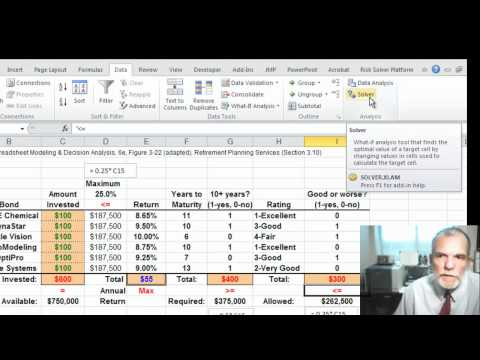

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

## Abstracción y Planteamiento del Problema

Variables:
- $A_1 , A_2, A_3, A_4, A_5, A_6$

Función a Maxímizar:
$1.085 A_1 + 1.095 A_2 + 1.1 A_3 + 1.0875 A_4 + 1.0925 A_5 + 1.09 A_6$

Info Adiciónal y Restricciones:
- Máx. 35% en alto riesgo
- Min. 50% en bonos de +10 años
- Máx. 25% por cada bono
- Bank de \$750,000

In [4]:
c=np.array([-1.085, -1.095, -1.1, -1.0875, -1.0925, -1.09])

Aub=np.array([ [0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
               [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
               [-1.0, -1.0, 0.0, -1.0, 0.0, -1.0],
               [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
             ])

bub=np.array([262500,
              750000,
              375000,
              187500,
              187500,
              187500,
              187500,
              187500,
              187500])

rend=opt.linprog(c,Aub,bub)
rend

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -818718.75
       ineqlin:  marginals: array([-0.01  , -1.085 , -0.    , -0.    , -0.    , -0.005 , -0.0025,
       -0.    , -0.005 ])
  residual: array([     0.,      0., 937500.,  75000., 112500.,      0.,      0.,
       187500.,      0.])
         lower:  marginals: array([0.    , 0.    , 0.    , 0.    , 0.0025, 0.    ])
  residual: array([112500.,  75000., 187500., 187500.,      0., 187500.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 3
         slack: array([     0.,      0., 937500.,  75000., 112500.,      0.,      0.,
       187500.,      0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf, inf])
             x: array([112500.,  75000., 187500., 187500.,      0., 18750

## Interpretación de Resultados

El dinero invertido en cada fondo es el siguiente
- $A_1$= \$112,500
- $A_2$= \$75,000
- $A_3$= \$187,500
- $A_4$= \$187,500
- $A_5$= \$0
- $A_6$= \$187,500

